# The WeRateDogs Twitter archive


### What we know-
1. Some ratings are not correct
2. Dog names could be incorrect
3. Dog stages are incorrect
4. Original ratings and no retweets
5. no need to go beyond August 1st, 2017

## Gathering

    - Twitter archive
    - image_predictions
    - extended tweets data

    

In [2]:
%pip install tweepy

  Using cached tweepy-4.14.0-py3-none-any.whl (98 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
Note: you may need to restart the kernel to use updated packages.


In [611]:
import requests as re
import numpy as np
import pandas as pd
import json
import tweepy
import os
from sqlalchemy import create_engine

In [11]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [89]:
df_twitter.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
225,849051919805034497,NaN,NaN,2017-04-04 00:12:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevin. Kevin doesn't give a single h*c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849051919...,13,10,Kevin,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
232,847962785489326080,NaN,NaN,2017-04-01 00:04:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Georgie. He's very shy. Only puppears ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847962785...,10,10,Georgie,None,None,None,None
779,775842724423557120,NaN,NaN,2016-09-13 23:44:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blue. He was having an average day unt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775842724...,12,10,Blue,None,None,None,None
632,793962221541933056,NaN,NaN,2016-11-02 23:45:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maximus. His face is stuck like that. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793962221...,12,10,Maximus,None,None,None,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
1234,712717840512598017,NaN,NaN,2016-03-23 19:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in any more polar bears. We ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712717840...,10,10,None,None,None,None,None
816,770787852854652928,NaN,NaN,2016-08-31 00:58:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. His tongue has gone rogue. Do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770787852...,10,10,Winston,None,None,None,None
2022,672068090318987265,NaN,NaN,2015-12-02 15:01:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Gizmo. He's upset because he's no...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672068090...,7,10,Gizmo,None,None,None,None


In [42]:
# Getting the contents of the URL and writing in a file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
url2 = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
file = re.get(url)
file2 = re.get(url2)
with open('image_predictions.tsv', mode='wb') as txt:
    txt.write(file.content)

with open('tweet_json.txt', mode='wb') as txt:
    txt.write(file2.content)


In [17]:
# Reading the contents of tsv as a dataframe
df_image = pd.read_csv('image_predictions.tsv', sep='\t')

In [43]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [81]:
# Reading the third piece of data line by line
json_data = []
with open('tweet_json.txt', mode='r') as file:
    for line in file:
        json_txt = json.loads(line)
        json_data.append(json_txt)
#     data = file.readline()
#     json_data = json.loads(data)
    
#     print(json_data)

In [90]:
df_tweets = pd.DataFrame(json_data)

In [91]:
df_tweets.sample(20)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1189,Wed Apr 06 22:29:56 +0000 2016,717841801130979328,717841801130979328,This is Barclay. His father was a banana. 11/1...,False,"[0, 84]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 717841792524222464, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2660,False,False,False,False,en,NaN,NaN,NaN,NaN
2205,Mon Nov 23 03:09:00 +0000 2015,668627278264475648,668627278264475648,This is Timofy. He's a pilot for Southwest. It...,False,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 668627275181633536, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,341,False,False,False,False,en,NaN,NaN,NaN,NaN
2161,Wed Nov 25 04:43:02 +0000 2015,669375718304980992,669375718304980992,This is Billl. He's trying to be a ghost but h...,False,"[0, 111]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669375711120093184, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1425,False,False,False,False,en,NaN,NaN,NaN,NaN
661,Tue Oct 25 18:44:32 +0000 2016,790987426131050500,790987426131050500,This is Misty. She has a cowboy hat on her nos...,False,"[0, 54]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 790987417641750529, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,11089,False,False,False,False,en,NaN,NaN,NaN,NaN
1542,Tue Jan 19 18:39:13 +0000 2016,689517482558820352,689517482558820352,This is Carl. He just wants to make sure you'r...,False,"[0, 113]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 689517477928292354, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3735,False,False,False,False,en,NaN,NaN,NaN,NaN
680,Wed Oct 19 15:37:03 +0000 2016,788765914992902144,788765914992902144,This is Butter. She can have whatever she want...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 788765906553962498, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,30658,False,False,False,False,en,NaN,NaN,NaN,NaN
2314,Tue Nov 17 16:09:56 +0000 2015,666649482315059201,666649482315059201,Cool dog. Enjoys couch. Low monotone bark. Ver...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666649475398680576, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,923,False,False,False,False,en,NaN,NaN,NaN,NaN
1890,Thu Dec 10 00:54:28 +0000 2015,674754018082705410,674754018082705410,Just received another perfect photo of dogs an...,False,"[0, 89]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674754014320402432, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",6.747522e+17,...,1456,False,False,False,False,en,NaN,NaN,NaN,NaN
1439,Tue Feb 09 02:07:12 +0000 2016,696877980375769088,696877980375769088,This is Misty. She's in a predicament. Not sur...,False,"[0, 129]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 696877972649807873, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2689,False,False,False,False,en,NaN,NaN,NaN,NaN
1625,Wed Jan 06 04:38:35 +0000 2016,684594889858887680,684594889858887680,"""FOR THE LAST TIME I DON'T WANNA PLAY TWISTER ...",False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 684594884913836032, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,9843,False,False,False,False,en,NaN,NaN,NaN,NaN


In [92]:
df_tweets.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [225]:
# Checking the entities in extended_entities
list(df_tweets[df_tweets['extended_entities'].notnull()].head(1)['extended_entities'].apply(lambda x: x['media'][0].keys()))

[dict_keys(['id', 'id_str', 'indices', 'media_url', 'media_url_https', 'url', 'display_url', 'expanded_url', 'type', 'sizes'])]

In [108]:
df_tweet = df_tweets[['created_at', 'id', 'retweet_count', 'favorite_count', 'full_text']]

In [437]:
# media_url from extended_entities
df_tweet['expanded_url'] = df_tweets[df_tweets['extended_entities'].notnull()]['extended_entities'].apply(lambda x: x['media'][0]['expanded_url'])

/tmp/ipykernel_88051/2534768996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['expanded_url'] = df_tweets[df_tweets['extended_entities'].notnull()]['extended_entities'].apply(lambda x: x['media'][0]['expanded_url'])


## Assessing

In [95]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Quality issues
df_twitter:-
- 1) tweet_id is int
- 2) timestamp is object
- 3) expanded urls has missing data
- 4) tweet_id with 810984652412424192 doesn't have rating and 666287406224695296 has incorrect i.e. 9/10 instead of 1/2
- 5) Name for dogs 'None' counted as object
- 6) Incomplete data for Dog names
- 7) Incomplete stages for dogs
- 8) source column can be standardised i.e. iphone, webclient, vine etc


df_tweet:-
- 9) extended_entities colum in df_tweets has media_urls

df_image:-
- 10) 2075 entries for data(sort missing data)
- 11) column names for p1 algorithm, p1_conf and p1_dog as user friendly names

### Tidiness issues
df_twitter:-
- 1) Dog stages mentioned as columns 
- 2) dog images and dog stages should be combined
- 3) Tweet information should be a separate table



In [96]:
df_twitter.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
1653,683462770029932544,NaN,NaN,2016-01-03 01:39:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hello forest pupper I am house pupper welcome...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/683462770...,8,10,None,None,None,pupper,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1984,672902681409806336,NaN,NaN,2015-12-04 22:17:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimison. He's stuck in a pot. Damn it ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672902681...,9,10,Jimison,None,None,None,None
965,750429297815552001,NaN,NaN,2016-07-05 20:41:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arnie. He's a Nova Scotian Fridge Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750429297...,12,10,Arnie,None,None,None,None
2017,672160042234327040,NaN,NaN,2015-12-02 21:06:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubba. He's a Titted Peebles Aorta. Ev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672160042...,8,10,Bubba,None,None,pupper,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
1773,678255464182861824,NaN,NaN,2015-12-19 16:47:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jessifer. She is a Bismoth Teriyaki. F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678255464...,9,10,Jessifer,None,None,None,None
550,804738756058218496,NaN,NaN,2016-12-02 17:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Django. He accidentally opened the fro...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804738756...,12,10,Django,None,None,None,None
2332,666345417576210432,NaN,NaN,2015-11-16 20:01:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Look at this jokester thinking seat belt laws ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666345417...,10,10,None,None,None,None,None


In [97]:
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [99]:
df_twitter['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [102]:
df_twitter[df_twitter['rating_denominator'] < 10]
# looks like 24/7 is not a rating for 810984652412424192
# rating for 666287406224695296 is 9/10 instead of 1/2

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [127]:
df_twitter['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [181]:
df_twitter[df_twitter['expanded_urls'].notna()]['expanded_urls']

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
                              ...                        
2351    https://twitter.com/dog_rates/status/666049248...
2352    https://twitter.com/dog_rates/status/666044226...
2353    https://twitter.com/dog_rates/status/666033412...
2354    https://twitter.com/dog_rates/status/666029285...
2355    https://twitter.com/dog_rates/status/666020888...
Name: expanded_urls, Length: 2297, dtype: object

In [190]:
df_twitter[df_twitter['retweeted_status_id'].isna()].sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1116,732585889486888962,NaN,NaN,2016-05-17 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...","When your teacher agreed on 10,000 RTs and no ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/732585889...,10,10,None,None,None,None,None


-----------

In [123]:
df_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1938,860524505164394496,https://pbs.twimg.com/media/C_EyeKuXkAAdxY-.jpg,1,Bedlington_terrier,0.286558,True,toy_poodle,0.235193,True,Lakeland_terrier,0.087951,True
855,696713835009417216,https://pbs.twimg.com/media/Cas5h-wWcAA3nAc.jpg,1,car_mirror,0.379797,False,Chesapeake_Bay_retriever,0.321589,True,vizsla,0.116931,True
105,667861340749471744,https://pbs.twimg.com/media/CUS4WJ-UsAEJj10.jpg,1,malamute,0.967275,True,Siberian_husky,0.016168,True,Eskimo_dog,0.011277,True
1774,828046555563323392,https://pbs.twimg.com/media/C33P8PrUcAMiQQs.jpg,3,patio,0.272972,False,window_screen,0.131295,False,boathouse,0.046393,False
386,673350198937153538,https://pbs.twimg.com/media/CVg4bo8WEAANEEE.jpg,1,West_Highland_white_terrier,0.119188,True,quill,0.104014,False,Maltese_dog,0.093944,True
1677,813187593374461952,https://pbs.twimg.com/media/C0kFzOQUoAAt6yb.jpg,1,golden_retriever,0.888181,True,Labrador_retriever,0.042312,True,Saluki,0.009702,True
65,667174963120574464,https://pbs.twimg.com/media/CUJIFoJWsAAL3Dc.jpg,1,toy_poodle,0.266437,True,Chihuahua,0.243223,True,bluetick,0.072806,True
1248,747816857231626240,https://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg,1,Pembroke,0.768923,True,Chihuahua,0.029053,True,Shetland_sheepdog,0.029035,True
1800,831911600680497154,https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg,4,bloodhound,0.777562,True,Great_Dane,0.047418,True,Leonberg,0.017943,True
822,693109034023534592,https://pbs.twimg.com/ext_tw_video_thumb/69310...,1,cocker_spaniel,0.740013,True,Welsh_springer_spaniel,0.088739,True,golden_retriever,0.047470,True


In [117]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [113]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [126]:
df_image[df_image['p2_conf'] > 0.4]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
13,666082916733198337,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,1,pug,0.489814,True,bull_mastiff,0.404722,True,French_bulldog,0.048960,True
72,667211855547486208,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,1,golden_retriever,0.462556,True,Labrador_retriever,0.454937,True,kuvasz,0.024193,True
101,667793409583771648,https://pbs.twimg.com/media/CUR6jqVWsAEgGot.jpg,1,dalmatian,0.535073,True,English_setter,0.451219,True,Great_Dane,0.008164,True
127,668268907921326080,https://pbs.twimg.com/media/CUYrBNQUkAA-zx4.jpg,1,Pembroke,0.484830,True,Cardigan,0.425303,True,basenji,0.014753,True
186,669363888236994561,https://pbs.twimg.com/media/CUoO1TLWsAA0Z3w.jpg,1,golden_retriever,0.539004,True,Irish_setter,0.406550,True,cocker_spaniel,0.041484,True
232,670417414769758208,https://pbs.twimg.com/media/CU3NE8EWUAEVdPD.jpg,1,sea_urchin,0.493257,False,porcupine,0.460565,False,cardoon,0.008146,False
285,671147085991960577,https://pbs.twimg.com/media/CVBktzQXAAAPpUA.jpg,1,Yorkshire_terrier,0.467202,True,cairn,0.440122,True,silky_terrier,0.058690,True
307,671533943490011136,https://pbs.twimg.com/media/CVHEju0XAAEUZRY.jpg,1,hen,0.556524,False,cock,0.442033,False,black_swan,0.001181,False
601,679777920601223168,https://pbs.twimg.com/media/CW8OYajUMAAPRoF.jpg,1,bloodhound,0.528819,True,bull_mastiff,0.420119,True,French_bulldog,0.009481,True
605,679862121895714818,https://pbs.twimg.com/media/CW9a_h1WwAApmAy.jpg,1,EntleBucher,0.523206,True,Greater_Swiss_Mountain_dog,0.431657,True,Appenzeller,0.044208,True


In [184]:
df_image[(df_image['p1_conf'] < 0.1) & (df_image['p1_dog'] == True) ]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
38,666644823164719104,https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg,1,Ibizan_hound,0.044333,True,Pembroke,0.043209,True,West_Highland_white_terrier,0.038906,True
109,667885044254572545,https://pbs.twimg.com/media/CUTN5V4XAAAIa4R.jpg,1,malamute,0.088530,True,golden_retriever,0.087499,True,muzzle,0.075008,False
136,668507509523615744,https://pbs.twimg.com/media/CUcECBYWcAAzFRg.jpg,1,basenji,0.055379,True,Shetland_sheepdog,0.054322,True,whippet,0.051913,True
250,670691627984359425,https://pbs.twimg.com/media/CU7GehOUYAA9nn-.jpg,1,Shetland_sheepdog,0.071124,True,home_theater,0.068398,False,American_Staffordshire_terrier,0.066964,True
680,683773439333797890,https://pbs.twimg.com/media/CX1AUQ2UAAAC6s-.jpg,1,miniature_pinscher,0.072885,True,Labrador_retriever,0.057866,True,schipperke,0.053257,True
789,690597161306841088,https://pbs.twimg.com/media/CZV-c9NVIAEWtiU.jpg,1,Lhasa,0.097500,True,koala,0.091934,False,sunglasses,0.091505,False
1503,784826020293709826,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1,chow,0.090341,True,binoculars,0.083499,False,Irish_setter,0.077456,True
1627,804413760345620481,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1,chow,0.090341,True,binoculars,0.083499,False,Irish_setter,0.077456,True


In [438]:
df_tweet.sample(10)

,created_at,id,retweet_count,favorite_count,full_text,media_url,expanded_url
828,Thu Aug 25 16:58:45 +0000 2016,768855141948723200,1034,4660,This is Jesse. He really wants a belly rub. Wi...,http://pbs.twimg.com/media/CquFrCKWAAAr32m.jpg,https://twitter.com/dog_rates/status/768855141...
1655,Sat Jan 02 04:27:31 +0000 2016,683142553609318400,1173,3162,Meet Brandy. She's a member of the Bloods. Men...,http://pbs.twimg.com/media/CXsChyjW8AQJ16C.jpg,https://twitter.com/dog_rates/status/683142553...
467,Thu Jan 05 17:13:55 +0000 2017,817056546584727552,1927,9517,This is Chloe. She fell asleep at the wheel. A...,http://pbs.twimg.com/media/C1bEl4zVIAASj7_.jpg,https://twitter.com/dog_rates/status/817056546...
288,Sun Mar 05 01:36:26 +0000 2017,838201503651401729,11525,0,RT @dog_rates: Meet Sunny. He can take down a ...,NaN,NaN
1134,Fri May 06 00:53:27 +0000 2016,728387165835677696,1075,3999,"This is Enchilada (yes, that's her real name)....",http://pbs.twimg.com/media/ChvAQuMWMAAVaKD.jpg,https://twitter.com/dog_rates/status/728387165...
1527,Thu Jan 21 19:04:15 +0000 2016,690248561355657216,477,1845,This is Maxwell. That's his moped. He rents it...,http://pbs.twimg.com/media/CZRBZ9mWkAAWblt.jpg,https://twitter.com/dog_rates/status/690248561...
825,Fri Aug 26 16:37:54 +0000 2016,769212283578875904,1969,5980,This is DonDon. He's way up but doesn't feel b...,http://pbs.twimg.com/media/CqzKfQgXEAAWIY-.jpg,https://twitter.com/dog_rates/status/769212283...
456,Sun Jan 08 17:20:31 +0000 2017,818145370475810820,3014,13671,This is Autumn. Her favorite toy is a cheesebu...,http://pbs.twimg.com/media/C1qi26rW8AMaj9K.jpg,https://twitter.com/dog_rates/status/818145370...
130,Tue May 23 16:16:06 +0000 2017,867051520902168576,8425,33420,"Oh my this spooked me up. We only rate dogs, n...",http://pbs.twimg.com/media/DAhiwb0XcAA8x5Q.jpg,https://twitter.com/dog_rates/status/867051520...
1367,Wed Feb 24 03:21:41 +0000 2016,702332542343577600,1755,3491,This is Rudy. He's going to be a star. 13/10 t...,NaN,NaN


In [439]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      2354 non-null   object
 1   id              2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
 3   favorite_count  2354 non-null   int64 
 4   full_text       2354 non-null   object
 5   media_url       2073 non-null   object
 6   expanded_url    2073 non-null   object
dtypes: int64(3), object(4)
memory usage: 128.9+ KB


In [111]:
df_tweet.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [441]:
df_tweet['expanded_url'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2354 entries, 0 to 2353
Series name: expanded_url
Non-Null Count  Dtype 
--------------  ----- 
2073 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


## Cleaning

In [479]:
df_twitter_clean = df_twitter.copy()
df_tweet_clean = df_tweet.copy()
df_image_clean =  df_image.copy()

### Define
1. df_twitter should have dog stages as a single column
2. dog stages are incomplete, extracting the same from text info of the tweet
3. dropping unneccesary columns and consolidating the same in a single data frame

### Code
1. using pandas melt to convert stages column of pandas into a single column
2. using apply method in pandas to extract dog stages
3. using the drop method to remove unwanted columns

In [480]:
id_vars = ['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',]

In [481]:
df_twitter_dogs = df_twitter_clean.melt(id_vars=id_vars, value_vars=['doggo', 'floofer', 'pupper', 'puppo'], var_name='stages', value_name='stage_name')

In [482]:
df_twitter_dogs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stages,stage_name
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9419,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,puppo,None
9420,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,puppo,None
9421,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,puppo,None
9422,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,puppo,None


In [484]:
# This order of dog stage fixed the incorrect dog stages in tweets-
# 172     858843525470990336
# 191     855851453814013952
# 200     854010172552949760
# 460     817777686764523521
# 531     808106460588765185
# 565     802265048156610565
# 575     801115127852503040
# 705     785639753186217984
# 733     781308096455073793
# 778     775898661951791106
# 822     770093767776997377
# 889     759793422261743616
# 956     751583847268179968
# 1063    741067306818797568
# 1113    733109485275860992
import numpy as np
def find_stage(text):
    dog_stage = ['pupper', 'floofer', 'puppo', 'doggo']
    for stage in dog_stage:
        if stage in text.lower():
            return stage
    return np.nan
        

In [485]:
df_twitter_dogs['stage_refined'] = df_twitter_dogs[df_twitter_dogs['text'].notna()]['text'].apply(find_stage)

In [486]:
df_twitter_dogs['stage_name'] = df_twitter_dogs['stage_name'].apply(lambda x: np.nan if x == 'None' else x)

In [487]:
df_twitter_dogs[['stage_name', 'stage_refined']].sample(10)

,stage_name,stage_refined
7842,NaN,floofer
8248,NaN,NaN
3075,NaN,NaN
6792,NaN,NaN
2862,NaN,NaN
6361,NaN,NaN
7399,NaN,doggo
1811,NaN,pupper
5260,NaN,NaN
2238,NaN,NaN


In [488]:
df_twitter_dogs[(df_twitter_dogs['stage_name'] != df_twitter_dogs['stage_refined']) & df_twitter_dogs['stage_name'].notna()]['tweet_id']

172     858843525470990336
191     855851453814013952
200     854010172552949760
460     817777686764523521
531     808106460588765185
565     802265048156610565
575     801115127852503040
705     785639753186217984
733     781308096455073793
778     775898661951791106
822     770093767776997377
889     759793422261743616
956     751583847268179968
1063    741067306818797568
1113    733109485275860992
Name: tweet_id, dtype: int64

In [489]:
df_twitter_dogs = df_twitter_dogs.drop('stages', axis=1);
df_twitter_dogs = df_twitter_dogs.drop('stage_name', axis=1);
df_twitter_dogs = df_twitter_dogs.drop_duplicates()

### Test
Check the row counts and columns

In [490]:
df_twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  stage_refined               423 n

In [491]:
df_twitter_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage_refined
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### Define
df_twitter:
1) tweet_id should be a string using astype
2) timestamp should be an object using to_datetime

### Code
use astype method to change the data types
use to_Datetime to change the timestamp data type
### Test


In [492]:
df_twitter_dogs['tweet_id'] = df_twitter_dogs['tweet_id'].astype(object)

In [493]:
# removing the timezone information
df_twitter_dogs['timestamp'] = df_twitter_dogs['timestamp'].apply(lambda x: x.split('+')[0].strip())

In [494]:
df_twitter_dogs['timestamp'] = pd.to_datetime(df_twitter_dogs['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [495]:
df_twitter_dogs['tweet_id'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2356 entries, 0 to 2355
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2356 non-null   object
dtypes: object(1)
memory usage: 36.8+ KB


In [496]:
df_twitter_dogs['timestamp'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2356 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype         
--------------  -----         
2356 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 36.8 KB


### Define
df_twitter:

3) expanded urls has missing data,
4) tweet_id with 810984652412424192 doesn't have rating and 666287406224695296 has incorrect i.e. 9/10 instead of 1/2

### Code
### Test


In [497]:
df_twitter_dogs.loc[df_twitter_dogs['tweet_id'] == 810984652412424192, 'rating_numerator'] = np.nan
df_twitter_dogs.loc[df_twitter_dogs['tweet_id'] == 810984652412424192, 'rating_denominator'] = np.nan
# df_twitter_dogs['tweet_id']

In [498]:
df_twitter_dogs.loc[df_twitter_dogs['tweet_id'] == 666287406224695296, 'rating_numerator'] = 9
df_twitter_dogs.loc[df_twitter_dogs['tweet_id'] == 666287406224695296, 'rating_denominator'] = 10


In [499]:
df_twitter_dogs.loc[df_twitter_dogs['tweet_id'] == 810984652412424192, 'rating_numerator']

516   NaN
Name: rating_numerator, dtype: float64

In [500]:
df_twitter_dogs.loc[df_twitter_dogs['tweet_id'] == 810984652412424192, 'rating_denominator']

516   NaN
Name: rating_denominator, dtype: float64

In [501]:
df_twitter_dogs.loc[df_twitter_dogs['tweet_id'] == 666287406224695296, 'rating_numerator']

2335    9.0
Name: rating_numerator, dtype: float64

### Define
df_twitter_dogs:
- 1) source column can be standardised i.e. iphone, webclient, vine etc

In [502]:
df_twitter_dogs['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [503]:
df_twitter_dogs['source'] = df_twitter_dogs['source'].str.extract(r'>(.*?)<', expand=False).str.strip()

In [508]:
df_twitter_dogs['source'].sample(5)

633      Twitter for iPhone
2037     Twitter for iPhone
1284     Twitter for iPhone
1357     Twitter for iPhone
1515    Vine - Make a Scene
Name: source, dtype: object

In [518]:
source_map = {'iPhone': 'Twitter for iPhone', 'twitter_web_client': 'Twitter Web Client', 'Vine': 'Vine - Make a Scene', 'TweetDeck': 'TweetDeck'}

In [519]:
def extract_val(value):
    for k,v in source_map.items():
        if v in value:
            return k
    return value

In [521]:
df_twitter_dogs['source'] = df_twitter_dogs['source'].apply(extract_val)

In [523]:
df_twitter_dogs['source'].value_counts()

iPhone                2221
Vine                    91
twitter_web_client      33
TweetDeck               11
Name: source, dtype: int64

### Define
df_twitter_dogs:
'name' column has 'None' as names for dogs
### Code
Fix the same with apply method
### Test
display the o/p

In [529]:
df_twitter_dogs['name'] = df_twitter_dogs['name'].apply(lambda x: np.nan if x == 'None' else x)

In [530]:
df_twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2355 non-null   float64       
 11  rating_denominator          2355 non-null   float64     

### Define
- 1) dog images and dog stages should be combined
- 2) Tweet information should be a separate table
- 3) Fix the column names for user_friendly names for p1_dog, p1_conf and p1
- 4) Original ratings with images only

### Code
merge the dataframes to later split in different dataframes
### Test
display the o/p

In [533]:
df_twitter_tweet = df_twitter_dogs.merge(df_tweet_clean, how='left', left_on='tweet_id', right_on='id')

In [549]:
df_twitter_complete = df_twitter_tweet.merge(df_image_clean, how='left', on='tweet_id')

In [551]:
list(df_twitter_complete.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage_refined',
 'created_at',
 'id',
 'retweet_count',
 'favorite_count',
 'full_text',
 'media_url',
 'expanded_url',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [541]:
list(df_twitter_tweet.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage_refined',
 'created_at',
 'id',
 'retweet_count',
 'favorite_count',
 'full_text',
 'media_url',
 'expanded_url']

In [601]:
columns_tweets = ['tweet_id',
 'timestamp',
 'source',
 'text',
 'retweet_count',
 'favorite_count',
 'media_url',
 'expanded_url']

columns_dogs = [ 'rating_numerator',
 'rating_denominator',
 'name',
 'stage_refined',
 'tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog'              ]

In [602]:
df_twitter_master = df_twitter_complete[df_twitter_complete['jpg_url'].notna() & df_twitter_complete['retweeted_status_id'].isna()]

In [603]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1994 non-null   object        
 1   in_reply_to_status_id       23 non-null     float64       
 2   in_reply_to_user_id         23 non-null     float64       
 3   timestamp                   1994 non-null   datetime64[ns]
 4   source                      1994 non-null   object        
 5   text                        1994 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               1994 non-null   object        
 10  rating_numerator            1993 non-null   float64       
 11  rating_denominator          1993 non-null   float64     

In [604]:
df_tweets_data = df_twitter_master[columns_tweets]
df_dogs_data = df_twitter_master[columns_dogs]

In [605]:
df_dogs_data = df_dogs_data.rename(columns={'p1': 'prediction1', 'p1_conf': 'prediction_percent1', 'p2': 'prediction2', 'p2_conf': 'prediction_percent2', 'p3': 'prediction3', 'p3_conf': 'prediction_percent3' })

In [606]:
df_dogs_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rating_numerator     1993 non-null   float64
 1   rating_denominator   1993 non-null   float64
 2   name                 1448 non-null   object 
 3   stage_refined        342 non-null    object 
 4   tweet_id             1994 non-null   object 
 5   jpg_url              1994 non-null   object 
 6   img_num              1994 non-null   float64
 7   prediction1          1994 non-null   object 
 8   prediction_percent1  1994 non-null   float64
 9   p1_dog               1994 non-null   object 
 10  prediction2          1994 non-null   object 
 11  prediction_percent2  1994 non-null   float64
 12  p2_dog               1994 non-null   object 
 13  prediction3          1994 non-null   object 
 14  prediction_percent3  1994 non-null   float64
 15  p3_dog               1994 non-null   o

In [607]:
df_tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1994 non-null   object        
 1   timestamp       1994 non-null   datetime64[ns]
 2   source          1994 non-null   object        
 3   text            1994 non-null   object        
 4   retweet_count   1994 non-null   float64       
 5   favorite_count  1994 non-null   float64       
 6   media_url       1994 non-null   object        
 7   expanded_url    1994 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 140.2+ KB


In [609]:
df_master = df_tweets_data.merge(df_dogs_data, how='left', on='tweet_id')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [610]:
master_file = 'twitter_archive_master.csv'
df_master.to_csv(master_file, index=False)

In [612]:
engine = create_engine('sqlite:///twitter_archive.db')

In [613]:
df_master.to_sql('twitter_master', engine, index=False)

1994

In [614]:
df_gather = pd.read_sql('SELECT * FROM twitter_master', engine)

In [615]:
df_gather

,tweet_id,timestamp,source,text,retweet_count,favorite_count,media_url,expanded_url,rating_numerator,rating_denominator,...,img_num,prediction1,prediction_percent1,p1_dog,prediction2,prediction_percent2,p2_dog,prediction3,prediction_percent3,p3_dog
0,892420643555336193,2017-08-01 16:23:56.000000,iPhone,This is Phineas. He's a mystical boy. Only eve...,8853.0,39467.0,http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,...,1.0,orange,0.097049,0,bagel,0.085851,0,banana,0.076110,0
1,892177421306343426,2017-08-01 00:17:27.000000,iPhone,This is Tilly. She's just checking pup on you....,6514.0,33819.0,http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,...,1.0,Chihuahua,0.323581,1,Pekinese,0.090647,1,papillon,0.068957,1
2,891815181378084864,2017-07-31 00:18:03.000000,iPhone,This is Archie. He is a rare Norwegian Pouncin...,4328.0,25461.0,http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,...,1.0,Chihuahua,0.716012,1,malamute,0.078253,1,kelpie,0.031379,1
3,891689557279858688,2017-07-30 15:58:51.000000,iPhone,This is Darla. She commenced a snooze mid meal...,8964.0,42908.0,http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,...,1.0,paper_towel,0.170278,0,Labrador_retriever,0.168086,1,spatula,0.040836,0
4,891327558926688256,2017-07-29 16:00:24.000000,iPhone,This is Franklin. He would like you to stop ca...,9774.0,41048.0,http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,...,2.0,basset,0.555712,1,English_springer,0.225770,1,German_short-haired_pointer,0.175219,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,666049248165822465,2015-11-16 00:24:50.000000,iPhone,Here we have a 1949 1st generation vulpix. Enj...,41.0,111.0,http://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,...,1.0,miniature_pinscher,0.560311,1,Rottweiler,0.243682,1,Doberman,0.154629,1
1990,666044226329800704,2015-11-16 00:04:52.000000,iPhone,This is a purebred Piers Morgan. Loves to Netf...,147.0,311.0,http://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,...,1.0,Rhodesian_ridgeback,0.408143,1,redbone,0.360687,1,miniature_pinscher,0.222752,1
1991,666033412701032449,2015-11-15 23:21:54.000000,iPhone,Here is a very happy pup. Big fan of well-main...,47.0,128.0,http://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,...,1.0,German_shepherd,0.596461,1,malinois,0.138584,1,bloodhound,0.116197,1
1992,666029285002620928,2015-11-15 23:05:30.000000,iPhone,This is a western brown Mitsubishi terrier. Up...,48.0,132.0,http://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,...,1.0,redbone,0.506826,1,miniature_pinscher,0.074192,1,Rhodesian_ridgeback,0.072010,1


### Insight 1
Most favourited dog

In [623]:
pd.read_sql('SELECT * FROM twitter_master order by favorite_count desc limit 3', engine)

,tweet_id,timestamp,source,text,retweet_count,favorite_count,media_url,expanded_url,rating_numerator,rating_denominator,...,img_num,prediction1,prediction_percent1,p1_dog,prediction2,prediction_percent2,p2_dog,prediction3,prediction_percent3,p3_dog
0,822872901745569793,2017-01-21 18:26:02.000000,iPhone,Here's a super supportive puppo participating ...,48265.0,132810.0,http://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,https://twitter.com/dog_rates/status/822872901...,13.0,10.0,...,1.0,Lakeland_terrier,0.196015,1,Labrador_retriever,0.160329,1,Irish_terrier,0.069126,1
1,744234799360020481,2016-06-18 18:26:18.000000,iPhone,Here's a doggo realizing you can stand in a po...,79515.0,131075.0,http://pbs.twimg.com/ext_tw_video_thumb/744234...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,...,1.0,Labrador_retriever,0.825333,1,ice_bear,0.044681,0,whippet,0.018442,1
2,879415818425184262,2017-06-26 19:07:24.000000,iPhone,This is Duddles. He did an attempt. 13/10 some...,45849.0,107956.0,http://pbs.twimg.com/ext_tw_video_thumb/879415...,https://twitter.com/dog_rates/status/879415818...,13.0,10.0,...,1.0,English_springer,0.383404,1,Boston_bull,0.134967,1,Cardigan,0.110481,1


### Insight 2
Most retweeted dog

In [622]:
pd.read_sql('SELECT * FROM twitter_master order by retweet_count desc limit 3', engine)

,tweet_id,timestamp,source,text,retweet_count,favorite_count,media_url,expanded_url,rating_numerator,rating_denominator,...,img_num,prediction1,prediction_percent1,p1_dog,prediction2,prediction_percent2,p2_dog,prediction3,prediction_percent3,p3_dog
0,744234799360020481,2016-06-18 18:26:18.000000,iPhone,Here's a doggo realizing you can stand in a po...,79515.0,131075.0,http://pbs.twimg.com/ext_tw_video_thumb/744234...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,...,1.0,Labrador_retriever,0.825333,1,ice_bear,0.044681,0,whippet,0.018442,1
1,807106840509214720,2016-12-09 06:17:20.000000,iPhone,This is Stephan. He just wants to help. 13/10 ...,56625.0,107015.0,http://pbs.twimg.com/ext_tw_video_thumb/807106...,https://twitter.com/dog_rates/status/807106840...,13.0,10.0,...,1.0,Chihuahua,0.505370,1,Pomeranian,0.120358,1,toy_terrier,0.077008,1
2,739238157791694849,2016-06-04 23:31:25.000000,iPhone,Here's a doggo blowing bubbles. It's downright...,52360.0,75163.0,http://pbs.twimg.com/ext_tw_video_thumb/739238...,https://twitter.com/dog_rates/status/739238157...,13.0,10.0,...,1.0,Eskimo_dog,0.503372,1,Siberian_husky,0.390413,1,malamute,0.080901,1


### Insight 3
Most adopted breed of dogs

In [631]:
pd.read_sql('SELECT count(*) as count, prediction1 FROM twitter_master group by prediction1 order by count desc limit 5', engine)

,count,prediction1
0,139,golden_retriever
1,95,Labrador_retriever
2,88,Pembroke
3,79,Chihuahua
4,54,pug


### Insight 4
prediction of dogs as per stages


In [643]:
pd.read_sql("SELECT count(*) as count, stage_refined,prediction1 FROM twitter_master where stage_refined != 'None' group by stage_refined order by count desc limit 5", engine)

,count,stage_refined,prediction1
0,237,pupper,French_bulldog
1,68,doggo,Pembroke
2,29,puppo,Pembroke
3,8,floofer,chow


<Axes: >

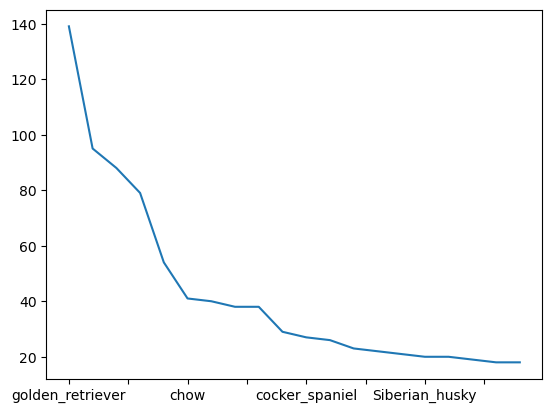

In [637]:
df_master['prediction1'].value_counts().head(20).plot()

<Axes: >

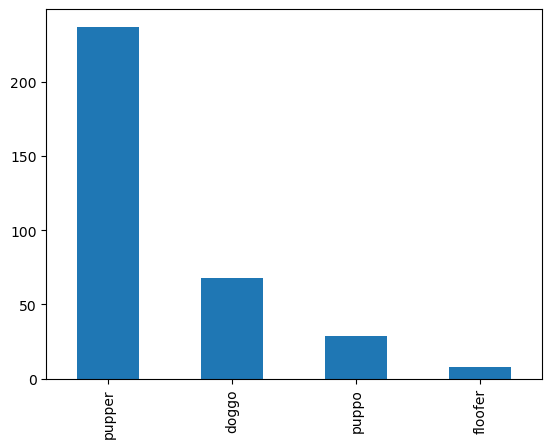

In [639]:
df_master['stage_refined'].value_counts().head(20).plot(kind='bar')